# HGU Bio + AI Workshop Tutorial

Created by Hankyu Jang on Feb 4 2023.

## Agenda

1. Introduction to `networkx` and `igraph` packages. We use `networkx` to analyze graphs and `igraph`to visualize graphs
2. Hands on exercise on recommending friends in social network. A toy example
3. Hands on exercise on Google web page ranking. A toy example
4. Hands on exercise on real data - Amazon product co-purchasing network. 242 K nodes, 1.2 M edges (public data - collected on March 02, 2003 by Stanford group)
5. Team assignment

----

In [1]:
!pip install networkx

In [2]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.1 MB/s eta 0:00:00


In [3]:
!pip install cairocffi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 1.5 MB/s eta 0:00:00


## 1. Introduction to `networkx` and `igraph`

Create a graph instance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import igraph as ig

In [5]:
G_nx = nx.Graph()

Add nodes

In [6]:
print(G_nx)

Graph with 0 nodes and 0 edges


In [7]:
G_nx.add_node(1)
G_nx.add_nodes_from([2, 'a', "Hankyu"])

Add edges

In [8]:
print(G_nx)

Graph with 4 nodes and 0 edges


In [9]:
G_nx.add_edge(1, 2)
G_nx.add_edges_from( [(1, 'a'), (1, "Hankyu")] )

Accessing node `1` and edge `(1, "Hankyu")`

In [10]:
print(G_nx)

Graph with 4 nodes and 3 edges


In [11]:
G_nx[1]

AtlasView({2: {}, 'a': {}, 'Hankyu': {}})

In [12]:
G_nx[1]["Hankyu"] # there are no edge attributes, so it returns an empty dictionary.

{}

Often when analyzing a graph, you may need to visit all nodes or edges iteratively. You can iterate nodes or edges by the following:

In [13]:
G_nx.nodes()

NodeView((1, 2, 'a', 'Hankyu'))

In [14]:
[(v, G_nx.nodes[v]) for v in G_nx.nodes()]

[(1, {}), (2, {}), ('a', {}), ('Hankyu', {})]

In [15]:
G_nx.edges()

EdgeView([(1, 2), (1, 'a'), (1, 'Hankyu')])

In [16]:
[(e, G_nx.edges[e]) for e in G_nx.edges()]

[((1, 2), {}), ((1, 'a'), {}), ((1, 'Hankyu'), {})]

Let's add an attribute called `color` for each node. Let Hankyu node be white and other ndoes be blue.

In [17]:
for v in G_nx.nodes():
    if v=="Hankyu":
        G_nx.nodes[v]['color'] = 'white'
    else:
        G_nx.nodes[v]['color'] = 'lightblue'

In [18]:
[(v, G_nx.nodes[v]) for v in G_nx.nodes()]

[(1, {'color': 'lightblue'}),
 (2, {'color': 'lightblue'}),
 ('a', {'color': 'lightblue'}),
 ('Hankyu', {'color': 'white'})]

You can aceess the `(node name, node attribute)` of the neighbors of node `1`:

In [19]:
[(v, G_nx.nodes[v]) for v in G_nx.neighbors(1)]

[(2, {'color': 'lightblue'}),
 ('a', {'color': 'lightblue'}),
 ('Hankyu', {'color': 'white'})]

In [20]:
[(v, G_nx.nodes[v]) for v in G_nx.neighbors("Hankyu")]

[(1, {'color': 'lightblue'})]

Draw the graph. You can use `networkx` to draw graphs, but not recommended. This functionality may be removed in the future. Reference: https://networkx.org/documentation/stable/reference/drawing.html

Use `igraph` to plot the graph. You'll now use the `G`, which is a graph instance of `networkx` to genereate `G_ig`, a graph instance of `igraph`. The names of the functions that does similar jobs in `networkx` and `igraph` are different.

Note: if you get an error message saying you need to install `cairocffi`, then install it by running `!pip install cairocffi`, then restart the notebook.

In [21]:
G_ig = ig.Graph.from_networkx(G_nx)

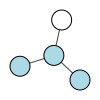

In [22]:
# set the size of the figure to be 100x100 pixels
ig.plot(G_ig, bbox=(100, 100))

In `igraph`, you use `vs` to look up details of nodes. `G_ig.vs[0]` will show the attributes (or features) of node named `1`

In [23]:
G_ig.vs[3]

igraph.Vertex(<igraph.Graph object at 0x782f9d953940>, 3, {'_nx_name': 'Hankyu', 'color': 'white'})

Let's look at the node attributes for all the nodes in `G_ig`

In [24]:
print( "Number of nodes: {}".format(G_ig.vcount()) )

Number of nodes: 4


In [25]:
for i in range(G_ig.vcount()):
    print(G_ig.vs[i])

igraph.Vertex(<igraph.Graph object at 0x782f9d953940>, 0, {'_nx_name': 1, 'color': 'lightblue'})
igraph.Vertex(<igraph.Graph object at 0x782f9d953940>, 1, {'_nx_name': 2, 'color': 'lightblue'})
igraph.Vertex(<igraph.Graph object at 0x782f9d953940>, 2, {'_nx_name': 'a', 'color': 'lightblue'})
igraph.Vertex(<igraph.Graph object at 0x782f9d953940>, 3, {'_nx_name': 'Hankyu', 'color': 'white'})


In [26]:
G_ig.vs["_nx_name"]

[1, 2, 'a', 'Hankyu']

Now, let's plot this graph with the names of the nodes, as shown above. Also, adjust the node size, color, and size of the plot

In [27]:
visual_style = dict()
visual_style["vertex_size"] = 50
visual_style["vertex_label"] = G_ig.vs["_nx_name"]
visual_style["vertex_label_size"] = 10
visual_style["bbox"] = (200, 200)
visual_style["margin"] = 30

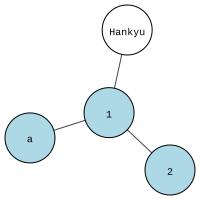

In [28]:
ig.plot(G_ig, **visual_style)

----

## 2. Hands on exercise on social network of Facebook user example

### Task1: Recommend a friend based on similarity
- Create the facebook user graph `G_facebook1` via `networkx` as in the lecture slides
- Visualize `G_facebook1`
- Recommend a friend to Alice, who is the most 'similar' her, in terms of the number of common neighbors.







In [29]:
node_list = ["Alice", "Brandon", "Cavin", "David", "Eleanor", "Fred", "Gia", "Hannah"]
edge_list = [
    ("Alice", "Brandon"),
    ("Alice", "David"),
    ("Alice", "Eleanor"),
    ("Brandon", "Cavin"),
    ("David", "Cavin"),
    ("Eleanor", "Cavin"),
    ("Cavin", "Fred"),
    ("Fred", "Gia"),
    ("Fred", "Hannah")
]

In [30]:
G_facebook1_nx = nx.Graph()
G_facebook1_nx.add_nodes_from(node_list)
G_facebook1_nx.add_edges_from(edge_list)

In [31]:
print(G_facebook1_nx)

Graph with 8 nodes and 9 edges


In [32]:
G_facebook1_ig = ig.Graph.from_networkx(G_facebook1_nx)

In [33]:
visual_style_facebook1 = dict()
visual_style_facebook1["vertex_size"] = 30
visual_style_facebook1["vertex_color"] = "skyblue"
visual_style_facebook1["vertex_label"] = G_facebook1_ig.vs["_nx_name"]
visual_style_facebook1["vertex_label_size"] = 6
visual_style_facebook1["bbox"] = (300, 300)
visual_style_facebook1["margin"] = 20

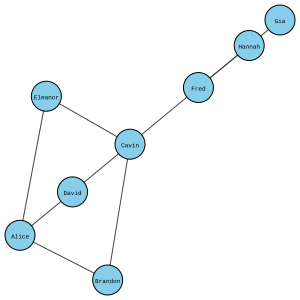

In [34]:
ig.plot(G_facebook1_ig, **visual_style_facebook1)

The figure is a bit misleading. (Fred, Gia) edge seems to overlap with (Fred,Hannah) edge. Let's explore other layout options.

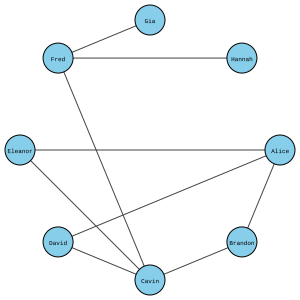

In [35]:
visual_style_facebook1["layout"] = G_facebook1_ig.layout("circle")
ig.plot(G_facebook1_ig, **visual_style_facebook1)

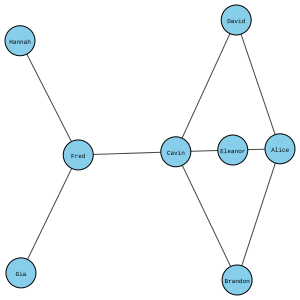

In [36]:
visual_style_facebook1["layout"] = G_facebook1_ig.layout("fr")
ig.plot(G_facebook1_ig, **visual_style_facebook1)

Now, we compute common neighbor centrality for all possible node pairs

In [37]:
G_facebook1_nx.nodes

NodeView(('Alice', 'Brandon', 'Cavin', 'David', 'Eleanor', 'Fred', 'Gia', 'Hannah'))

In [38]:
n_nodes_G_facebook1 = G_facebook1_nx.number_of_nodes()
common_neighbor_2d_array = np.zeros((n_nodes_G_facebook1, n_nodes_G_facebook1)).astype(int)

In [39]:
for u_idx, u in enumerate(G_facebook1_nx.nodes):
    for v_idx, v in enumerate(G_facebook1_nx.nodes):
        # note: nx.common_neighbors() returns the iterator of common neighbors
        if u!=v:
            common_neighbor_2d_array[u_idx, v_idx] =  len([cn for cn in nx.common_neighbors(G_facebook1_nx, u, v)])

In [40]:
df_common_neighbor = pd.DataFrame(
    data=common_neighbor_2d_array,
    columns=[v for v in G_facebook1_nx.nodes],
    index=[v for v in G_facebook1_nx.nodes]
    )

In [41]:
df_common_neighbor

,Alice,Brandon,Cavin,David,Eleanor,Fred,Gia,Hannah
Alice,0,0,3,0,0,0,0,0
Brandon,0,0,0,2,2,1,0,0
Cavin,3,0,0,0,0,0,1,1
David,0,2,0,0,2,1,0,0
Eleanor,0,2,0,2,0,1,0,0
Fred,0,1,0,1,1,0,0,0
Gia,0,0,1,0,0,0,0,1
Hannah,0,0,1,0,0,0,1,0


Based on the above common neighbor table, Cavin has the most number of common neighbors with Alice. So, recommend Cavin to Alice.

### Task2: Recommend a friend based on their popularity
- Create another facebook user graph `G_facebook2`. Copy `G_facebook1`, then update the graph by
  - adding an influencer node, named "X" and 10 additional nodes
  - connecting this influencer node to newly added 10 nodes. In other words, add 10 edges.
- Visualize `G_facebook2`
- Recommend a friend to Alice, who's the most 'central' node in terms of degree centrality.

In [42]:
import copy

In [43]:
G_facebook2_nx = copy.deepcopy(G_facebook1_nx)

In [44]:
influencer_node = "X"
other_nodes_to_add = ["v{}".format(i) for i in range(10)]
new_edge_list = [(influencer_node, v) for v in other_nodes_to_add]

In [45]:
print([e for e in new_edge_list])

[('X', 'v0'), ('X', 'v1'), ('X', 'v2'), ('X', 'v3'), ('X', 'v4'), ('X', 'v5'), ('X', 'v6'), ('X', 'v7'), ('X', 'v8'), ('X', 'v9')]


In [46]:
G_facebook2_nx.add_nodes_from(other_nodes_to_add + [influencer_node])
G_facebook2_nx.add_edges_from(new_edge_list)

In [47]:
G_facebook2_ig = ig.Graph.from_networkx(G_facebook2_nx)

In [48]:
visual_style_facebook2 = dict()
visual_style_facebook2["vertex_size"] = 35
visual_style_facebook2["vertex_color"] = "skyblue"
visual_style_facebook2["vertex_label"] = G_facebook2_ig.vs["_nx_name"]
visual_style_facebook2["vertex_label_size"] = 7
visual_style_facebook2["bbox"] = (500, 300)
visual_style_facebook2["margin"] = 20

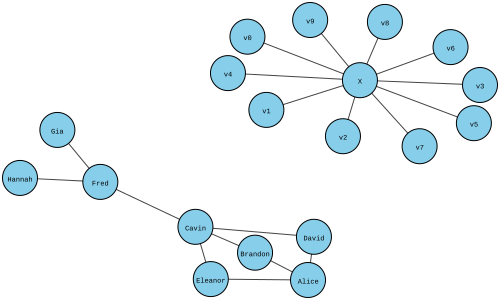

In [49]:
visual_style_facebook2["layout"] = G_facebook2_ig.layout("fr")
ig.plot(G_facebook2_ig, **visual_style_facebook2)

NOTE: `networkx` implementation of degree centrality divides the degree of each node by the maximum possible connection, which is the total number of nodes in the graph minus 1.

In [50]:
degree_centrality_dict = nx.degree_centrality(G_facebook2_nx)

In [51]:
df_degree = pd.DataFrame(
    data=degree_centrality_dict.items(),
    columns=["node", "degree_centrality"]
)
df_degree.sort_values(by="degree_centrality", ascending=False).round(2).T

,18,2,5,0,4,3,1,6,7,8,10,11,12,13,14,15,16,17,9
node,X,Cavin,Fred,Alice,Eleanor,David,Brandon,Gia,Hannah,v0,v2,v3,v4,v5,v6,v7,v8,v9,v1
degree_centrality,0.56,0.22,0.17,0.17,0.11,0.11,0.11,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


Based on the above degree centrality table, node `X` is the most central node. Therefore, recommend `X` to Alice.

### Task3: Select a node for viral marketing
- Use `G_facebook1`
- Select a node that is the most central in terms of closeness centrality
- Select a node that is the most central in terms of betweenness centrality

In [52]:
closeness_centrality_dict = nx.closeness_centrality(G_facebook1_nx)

In [53]:
closeness_centrality_dict

{'Alice': 0.4375,
 'Brandon': 0.5,
 'Cavin': 0.7,
 'David': 0.5,
 'Eleanor': 0.5,
 'Fred': 0.5833333333333334,
 'Gia': 0.3888888888888889,
 'Hannah': 0.3888888888888889}

In [54]:
df_closeness = pd.DataFrame(
    data=closeness_centrality_dict.items(),
    columns=["node", "closeness_centrality"]
)
df_closeness.sort_values(by="closeness_centrality", ascending=False).round(2).T

,2,5,1,3,4,0,6,7
node,Cavin,Fred,Brandon,David,Eleanor,Alice,Gia,Hannah
closeness_centrality,0.7,0.58,0.5,0.5,0.5,0.44,0.39,0.39


In [55]:
betweenness_centrality_dict = nx.betweenness_centrality(G_facebook1_nx)

In [56]:
df_betweenness = pd.DataFrame(
    data=betweenness_centrality_dict.items(),
    columns=["node", "betweenness_centrality"]
)
df_betweenness.sort_values(by="betweenness_centrality", ascending=False).round(2).T

,2,5,0,1,3,4,6,7
node,Cavin,Fred,Alice,Brandon,David,Eleanor,Gia,Hannah
betweenness_centrality,0.64,0.52,0.07,0.06,0.06,0.06,0.0,0.0


Cavin is the most central node both interms of closeness (0.7) and betweenness (0.64). So, select Cavin.

## 3. Hands on exercise on Google web page ranking example

Unlike the graphs that we generated above, graph of web pages is a directed graph. You'll generate directed graph instance from class `DiGraph`.

In [57]:
node_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
edge_list = [('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'D'), ('B', 'G'), ('C', 'G'), ('D', 'G'), ('E', 'G'), ('F', 'G'), ('G', 'F')]

In [58]:
DiG_webpage_nx = nx.DiGraph()
DiG_webpage_nx.add_nodes_from(node_list)
DiG_webpage_nx.add_edges_from(edge_list)

In [59]:
DiG_webpage_ig = ig.Graph.from_networkx(DiG_webpage_nx)

In [60]:
visual_style_webpage = dict()
visual_style_webpage["vertex_size"] = 30
visual_style_webpage["vertex_color"] = "skyblue"
visual_style_webpage["vertex_label"] = DiG_webpage_ig.vs["_nx_name"]
visual_style_webpage["vertex_label_size"] = 10
visual_style_webpage["bbox"] = (300, 200)
visual_style_webpage["margin"] = 20

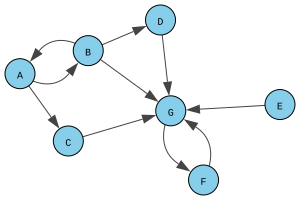

In [61]:
ig.plot(DiG_webpage_ig, **visual_style_webpage)

In [62]:
pagerank_dict = nx.pagerank(DiG_webpage_nx)

In [63]:
df_pagerank = pd.DataFrame(
    data=pagerank_dict.items(),
    columns=["node", "pagerank_centrality"]
)
df_pagerank.sort_values(by="pagerank_centrality", ascending=False).round(3).T

,6,5,1,2,0,3,4
node,G,F,B,C,A,D,E
pagerank_centrality,0.446,0.401,0.035,0.035,0.031,0.031,0.021


As expected, since webpage `G` received the most number of links, `G` has the highest centrality.

An important things to note is, although webpage `F` has 1 incoming link, its centrality is very high, a little less than the centrality of `G`. An intuitive explanation is that webpage `F` is being referenced by an important webpage `G`, so thereby node `F` is also a central node. Algorithmically, as the PageRank is computed by tracking the most visited webpages via random web-surfers, no matter which webpage it started, within a few clicks it reaches `G`, then from here, it bounces `F` and `G` reapeatedly. Therefore, `F` gets visited frequently, despite having only one incoming link.

----

## 4. Hands on exercise on the real data - Amazon product co-purchasing network. 242 K nodes, 1.2 M edges (public data - collected on March 02, 2003 by Stanford group)

Amazon.com is a e-commerce company where you can purchase (almost) anything online. When you click the product you're interested in, it has information on the product, including `Customers Who Bought This Item Also Bought ...` tab Which basically shows (related) products. For instance, when purchasing a snowboard pants, the products that will likely to show up in this tab are ski goggles, ski gloves, ski jacket, etc.

The dataset that we use in this section is collected by Stanford Network Analysis Project (SNAP), by crawling Amazon website on March 02 2003. Based on their description, "If a product i is frequently co-purchased with product j, the graph contains a directed edge from i to j". Details can be found here:
https://snap.stanford.edu/data/amazon0302.html

### Download the data then load the data

In [64]:
!wget https://snap.stanford.edu/data/amazon0302.txt.gz

--2024-02-29 07:56:48--  https://snap.stanford.edu/data/amazon0302.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4664334 (4.4M) [application/x-gzip]
Saving to: ‘amazon0302.txt.gz’

amazon0302.txt.gz   100%[===================>]   4.45M  2.18MB/s    in 2.0s    

2024-02-29 07:56:50 (2.18 MB/s) - ‘amazon0302.txt.gz’ saved [4664334/4664334]



In [65]:
!gzip -d amazon0302.txt.gz

In [66]:
!head -n 10 amazon0302.txt

# Directed graph (each unordered pair of nodes is saved once): Amazon0302.txt 
# Amazon product co-purchaisng network from March 02 2003
# Nodes: 262111 Edges: 1234877
# FromNodeId	ToNodeId
0	1
0	2
0	3
0	4
0	5
1	0


In [67]:
df_product_co_purchase = pd.read_csv("amazon0302.txt", sep="\t", skiprows=4, names=["purchased_item", "co_purchased_item"])

In [68]:
df_product_co_purchase.shape

(1234877, 2)

In [69]:
df_product_co_purchase.head()

,purchased_item,co_purchased_item
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


### Problem description

When you click `snowboarding pants A`, co-purchased items such as `ski glove B` or `ski goggle C` will be listed. You may look at the glove and goggle, and think "is there any other pants that go better with these items?" In other words, what are some similar items with this one (that I'm viewing) that has similar co-purchased items?

You have the co_purchased item data. Let's build a recommender system that recommends other items that have similar co_purchasing pattern.

In [70]:
set_purchased_item_nodes = set(df_product_co_purchase["purchased_item"].unique())
set_co_purchased_item_nodes = set(df_product_co_purchase["co_purchased_item"].unique())
set_item_nodes = set_purchased_item_nodes.union( set_co_purchased_item_nodes )
list_item_nodes = list(set_item_nodes)

In [71]:
list_item_edges = df_product_co_purchase.values
list_item_edges[:3]

array([[0, 1],
       [0, 2],
       [0, 3]])

In [72]:
DiG_amazon_nx = nx.DiGraph()
DiG_amazon_nx.add_nodes_from(list_item_nodes)
DiG_amazon_nx.add_edges_from(list_item_edges)

In [73]:
print(DiG_amazon_nx)

DiGraph with 262111 nodes and 1234877 edges


Note: This is a directed graph, and we need to find common neighbors from outgoing edges. However, there is no predefined function in `networkx` for this. So let's implement this our own.

The logic is the following:
- For all possible pair of items (say, item x-item y)
  - (1) get the set of nodes in item x's outgoing edges
  - (2) get the set of nodes in item y's outgoing edges
  - (3) get the intersection of the two sets from (1) and (2), and save the size of the set.

Once the computation is done, for a query item (e.g., item z), recommend the item that is the most similar to query item.

Note: Do not run the cell below - it'll crash due to memory. Because the graph is large, it's not feasible to save all the pairs of similarity into this large 2-d array. Therefore, let's write a function that takes in the query item and return the most similar item, following the same logic (but just computing for each pair of item). Let's write it memory efficiently.

Let's use the `networkx` function, called `successors`. The definition is as follows: "A successor of n is a node m such that there exists a directed edge from n to m."

In [74]:
# n_nodes_DiG_amazon = len(set_item_nodes)
# amazon_item_similarity_2d_array = np.zeros((n_nodes_DiG_amazon, n_nodes_DiG_amazon)).astype(int)

In [75]:
# Memory efficient implementation.
def recommend_item_based_on_co_purchase(G, query_item):
    best_item = None
    max_similarity_score = -1

    query_item_successors_iterator = G.successors(query_item)
    set_of_query_item_successors = set([v for v in query_item_successors_iterator])

    for candidate_item in G.nodes():
        if candidate_item != query_item:
            candidate_item_successors_iterator = G.successors(candidate_item)
            set_of_candidate_item_successors = set([v for v in candidate_item_successors_iterator])

            set_of_overlaps_in_successors = set_of_query_item_successors.intersection(set_of_candidate_item_successors)
            number_of_overlapping_co_purchase_items = len(set_of_overlaps_in_successors)

            if number_of_overlapping_co_purchase_items > max_similarity_score:
                max_similarity_score = number_of_overlapping_co_purchase_items
                best_item = candidate_item

    return best_item, max_similarity_score

In [76]:
query_item = 1000

In [77]:
recommended_item, max_similarity_score = recommend_item_based_on_co_purchase(DiG_amazon_nx, query_item)
print("Query Item: {}\nItem to recommend: {}\nNumber of overlapping co-purchase items: {}".format(query_item, recommended_item, max_similarity_score))

Query Item: 1000
Item to recommend: 1863
Number of overlapping co-purchase items: 2


Finally, let's visualize the query item (and its outgoing edges) as well as the recommended item (and its outgoing edges)

In [78]:
list_of_query_item_successors = [v for v in DiG_amazon_nx.successors(query_item)]
set_of_query_item_successors = set(list_of_query_item_successors)

list_of_recommended_item_successors = [v for v in DiG_amazon_nx.successors(recommended_item)]
set_of_recommended_item_successors = set(list_of_recommended_item_successors)

set_of_overlaps_in_successors = set_of_query_item_successors.intersection(set_of_recommended_item_successors)

In [79]:
node_subset = [query_item] + list_of_query_item_successors + [recommended_item] + list_of_recommended_item_successors

In [80]:
DiG_amazon_subgraph_nx = DiG_amazon_nx.subgraph(node_subset)

In [81]:
print(DiG_amazon_subgraph_nx)

DiGraph with 10 nodes and 22 edges


In [82]:
color_list = []
for v in DiG_amazon_subgraph_nx:
    if v == query_item:
        color_list.append("orange")
    elif v == recommended_item:
        color_list.append("limegreen")
    elif v in set_of_overlaps_in_successors:
        color_list.append("lightblue")
    else:
        color_list.append("white")

In [83]:
DiG_amazon_subgraph_ig = ig.Graph.from_networkx(DiG_amazon_subgraph_nx)

In [84]:
visual_style_amazon = dict()
visual_style_amazon["vertex_size"] = 30
visual_style_amazon["vertex_color"] = color_list
visual_style_amazon["vertex_label"] = DiG_amazon_subgraph_ig.vs["_nx_name"]
visual_style_amazon["vertex_label_size"] = 10
visual_style_amazon["bbox"] = (400, 300)
visual_style_amazon["margin"] = 20

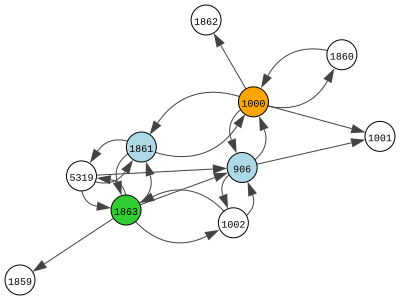

In [85]:
ig.plot(DiG_amazon_subgraph_ig, **visual_style_amazon)

I figure above, query item is in orange, recommended item is in green, and overlapping co-purchase items are in lightblue, and non-overlapping co-purchase items are in white.

----

## 5. Team assignment

For the team assignment, you'll apply what we learned in network analysis to solve problems in real world graphs. Please follow this guideline to prepare and analyze network data.

### 5.1 Dataset selection

Select a network dataset to work on. Data formats may vary, but it'll typically have a pair of node for each row in the file.

For instance, first few lines of the drug-target interaction network (ChG-Miner_miner-chem-gene.tsv retrieved from, https://snap.stanford.edu/biodata/datasets/10002/10002-ChG-Miner.html ) looks like the following:
```
#Drug	Gene
DB00357	P05108
DB02721	P00325
DB00773	P23219
DB07138	Q16539
```

For such file, you can read the data using `read_csv` in Pandas.
```
filename = "ChG-Miner_miner-chem-gene.tsv"
df_edgelist = pd.read_csv(filename, sep='\t')
```

Select a dataset that looks interesting to you.
- SNAP large dataset collection: https://snap.stanford.edu/data/
- SNAP biomedical network dataset collection: https://snap.stanford.edu/biodata/index.html

### 5.2 Data exploration

Once you selected the dataset, explore the data. That is, load the graph using `networkx`, and try to visualize it using `igraph`. Visualization may be hard even for graphs with > 100 nodes. Then, select a node, and visualize it locally (e.g., visualize the neighborhood). You can do this by finding the neighboring nodes, then getting a subgraph that consists of those selected nodes only.

### 5.3 Define a problem

What are you interested in solving? For istance, if you chose to analyze drug-target interaction network, an idea could be to find similar drugs, in terms of their targetting genes. This could be viewed as a simple method for drug discovery using drug-target interaction network data.

### 5.4 Solve the problem

Based on what we learned in this workshop, solve the problem using network analysis. We learned different ways to compute similarity between two nodes as well as different network centrality methods. You can apply these directly to solve your problem. There are many more similarity | centrality methods that are not covered in the lecture. Please feel free to take a look and use these other methods if they are more applicable to your problem. Of course, you can design your own method as well.

Here are links to networkx functions that may help:
- Centrality: https://networkx.org/documentation/stable/reference/algorithms/centrality.html
- Link prediction (similarity indices, like Jaccard coefficient): https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html

----

## References


`networkx`
- tutorial: https://networkx.org/documentation/stable/tutorial.html

`igraph`
- tutorial: https://python.igraph.org/en/stable/tutorial.html